In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


aaup=pd.read_csv("aaup.csv")
usnews=pd.read_csv("usnews.csv")
usnews.columns=['FICE','name','state','type','avg_m_SAT_score','avg_v_SAT_score','avg_tot_SAT_score','avg_ACT_score','q1- MSAT','q3- MSAT','q1- VSAT','q3- VSAT','q1- ACT','q3-ACT','appl_received','appl_accepted','new_enrolled','pct._new_students_from_top_10%_of_H.S._class','pct._new_students_from_top_25%_of_H.S._class','fulltime_ugs','parttime_ugs','in_state_tuition','out_of_state_tuition','room_and_board_costs','room_costs','board_costs','additional_fees','est_book_costs','est_personal_spending','pct_of_faculty_with_Ph.D.s','pct_of faculty_with_terminal_degree','s_f_ratio','pct.alumni_who_donate','instructional_expenditure/student','graduation_rate']
aaup.columns=['FICE','name','state','type','avg sal-full profs','avg sal-assoct profs','avg sal-asst profs','avg sal-all ranks','avg comp-full profs','avg comp-assct profs','avg comp-asst profs','avg comp-all ranks','no. full profs','no. assoct profs','no. asst profs','no. instructors','no. faculty-all ranks']

Correlation coefficient:  -0.4172103253709604


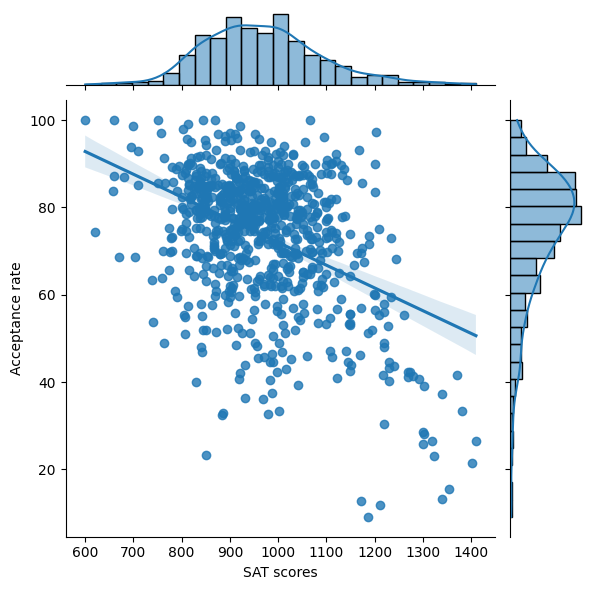

In [3]:
#Q1. Acceptance rate vs avg SAT scores
a=usnews.appl_accepted
b=usnews.appl_received
c=usnews.avg_tot_SAT_score

x=[]
y=[]

j=0
for i in range(len(a)):
    if c[i]!='*' and a[i]!='*' and b[i]!='*':
       x.append(int(c[i]))
       y.append(((int(a[i]))/int(b[i]))*100)
x1=pd.Series(x)
y1=pd.Series(y)
print("Correlation coefficient: ",y1.corr(x1)) 

data1 = pd.DataFrame({'SAT scores': x, 'Acceptance rate': y})
sns.jointplot(data=data1, x='SAT scores', y='Acceptance rate',kind='reg')

plt.show()

Correlation coefficient:  -0.2789017135531337


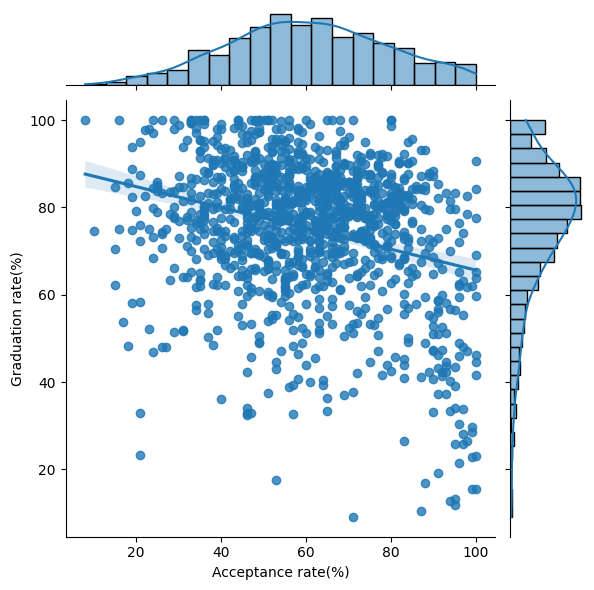

In [4]:
#Q2.Is there a relation between a college's acceptance rate and its graduation rate?
d=usnews.graduation_rate

x=[]
y=[]

for i in range(len(a)):
    
    if d[i]!='*' and a[i]!='*' and b[i]!='*':
      z=(int(a[i]))/int(b[i])*100
      if z<=100 and int(d[i])<=100:
         x.append(int(d[i]))
       
         y.append(z)      
       
x1=pd.Series(x)
y1=pd.Series(y)
print("Correlation coefficient: ",x1.corr(y1)) 

data1 = pd.DataFrame({'Acceptance rate(%)': x, 'Graduation rate(%)': y})
sns.jointplot(data=data1, x='Acceptance rate(%)', y='Graduation rate(%)',kind='reg')

plt.show()

Correlation coefficient:  -0.269008589531987


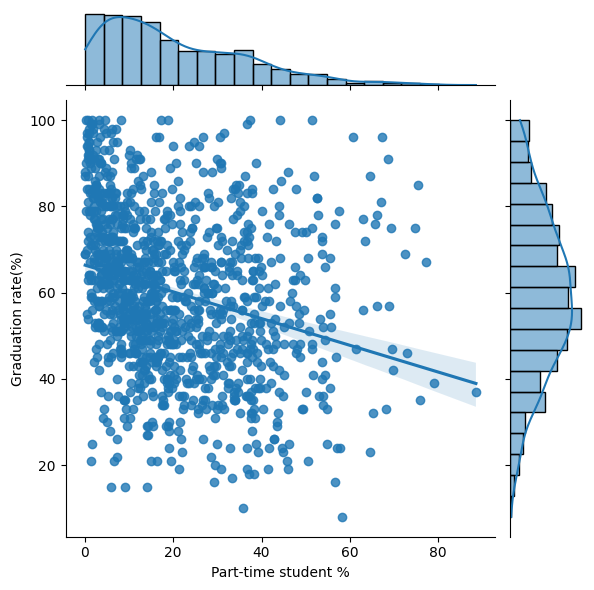

In [5]:
#Q3.Are colleges with higher percentages of part-time students more likely to have lower graduation rates?
e=usnews.parttime_ugs
f=usnews.fulltime_ugs

x=[]
y=[]

for i in range(len(a)):
    if e[i]!='*' and f[i]!='*' and d[i]!='*' and int(d[i])<=100:
       x.append(((int(e[i])/(int(e[i])+int(f[i])))*100))
       y.append(int(d[i]))
       j+=1

x1=pd.Series(x)
y1=pd.Series(y)
print("Correlation coefficient: ",x1.corr(y1)) 

data1 = pd.DataFrame({'Part-time student %': x, 'Graduation rate(%)': y})
sns.jointplot(data=data1, x='Part-time student %', y='Graduation rate(%)',kind='reg')

plt.show()

Correlation coefficient:  0.484264644926403


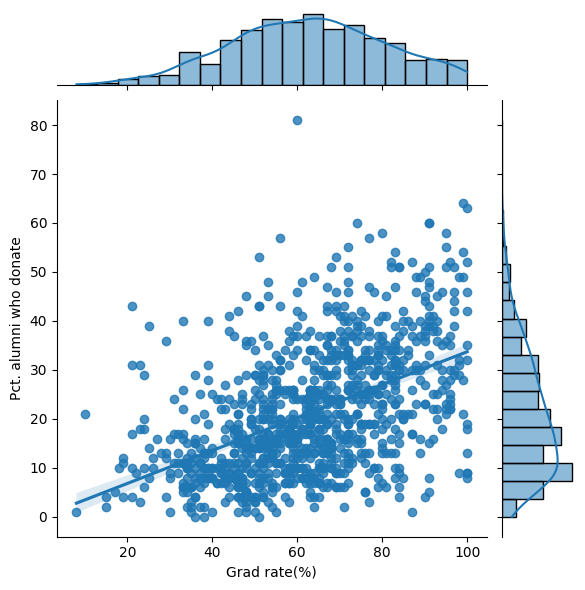

In [6]:
#Q4.Grad rate vs pct of alumni who donate
gr=[]
pdon=[]
for i in range(len(a)):
    if usnews.graduation_rate[i]!='*' and usnews['pct.alumni_who_donate'][i]!='*' and int(usnews.graduation_rate[i])<=100:
        gr.append(int(usnews.graduation_rate[i]))
        pdon.append(int(usnews['pct.alumni_who_donate'][i]))
x1=pd.Series(gr)
y1=pd.Series(pdon)
data1=pd.DataFrame({"Grad rate(%)":x1,"Pct. alumni who donate":y1})
print("Correlation coefficient: ",x1.corr(y1)) 

sns.jointplot(data=data1,x='Grad rate(%)',y='Pct. alumni who donate',kind='reg')
plt.show()

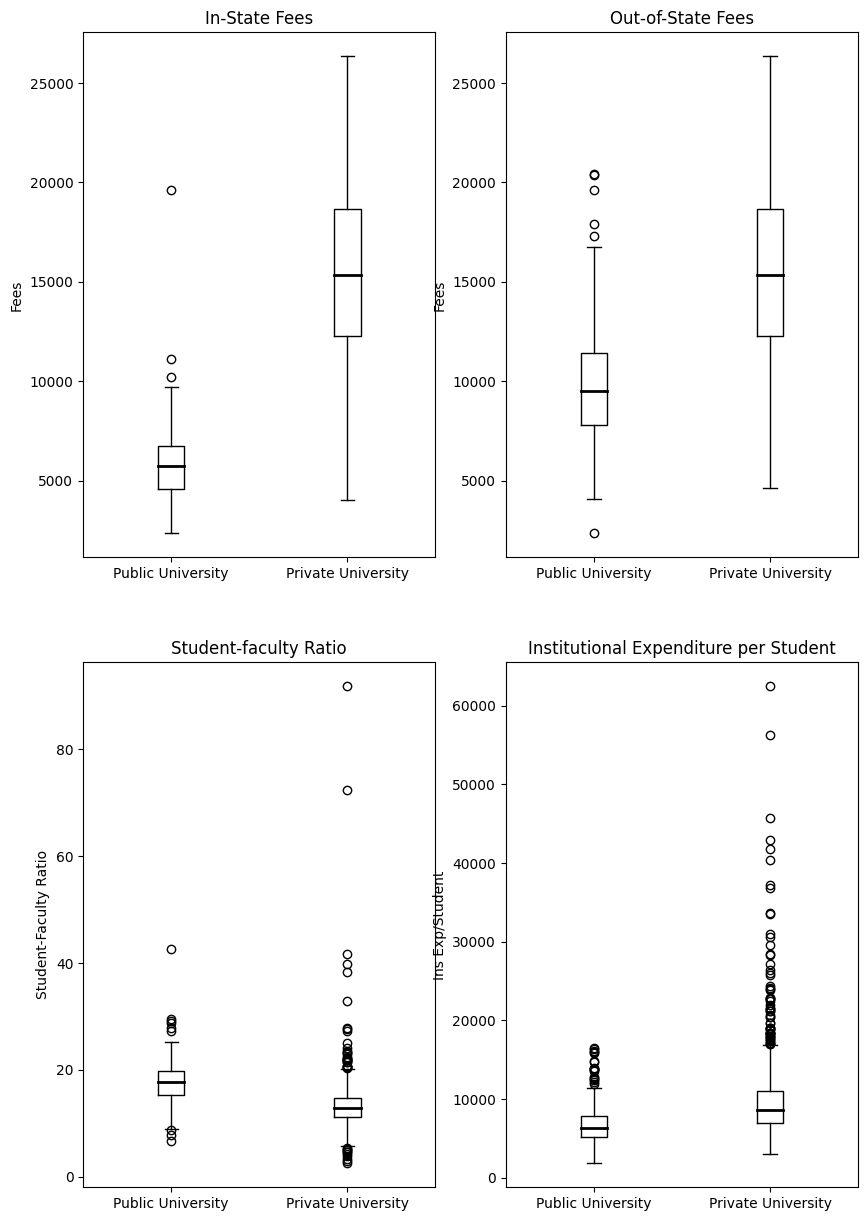

Public in state:5780.578125, Public out state:9759.302083333334
Pvt in state:15654.515625, Pvt out state:15684.80859375
Avg s/f ratio in public university:17.65052083333333, Avg s/f ratio in pvt university:13.354036458333335
Avg pct. of faculty with terminal degree in public university: 77.98697916666667
Avg pct. of faculty with terminal degree in pvt university: 74.59244791666667
Instructional expenditure/student in public university:6876.825520833333
Instructional expenditure/student in pvt university:10064.063802083334


In [7]:
#Q5. Are public universities likely to be cheaper to attend than pvt universities? Does this mean that the cheaper one compromises in terms of facilities?
pu=[]
pr=[]
fees_pu_in=[]
fees_pu_out=[]
fees_pr_in=[]
fees_pr_out=[]
pct_terminal_pu=[]
pct_terminal_pr=[]
sfr_pu=[]
sfr_pr=[]
in_exp_pu=[]
in_exp_pr=[]

for i in range(len(a)):
    if usnews.type[i]!='*' and usnews.s_f_ratio[i]!='*' and usnews.room_and_board_costs[i]!='*' and usnews.in_state_tuition[i]!='*' and usnews.out_of_state_tuition[i]!='*' and usnews['pct_of faculty_with_terminal_degree'][i]!='*' and usnews['pct_of faculty_with_terminal_degree'][i]!='*' and usnews["instructional_expenditure/student"][i]!='*':
        if usnews.type[i]==1:
            pu.append(int(usnews.type[i]))           
            fees_pu_in.append(int(usnews.room_and_board_costs[i])+int(usnews.in_state_tuition[i]))
            fees_pu_out.append(int(usnews.room_and_board_costs[i])+int(usnews.out_of_state_tuition[i]))
            pct_terminal_pu.append(int(usnews['pct_of faculty_with_terminal_degree'][i]))
            sfr_pu.append(float(usnews.s_f_ratio[i]))
            in_exp_pu.append(int(usnews["instructional_expenditure/student"][i]))
        if usnews.type[i]==2:
            pr.append(int(usnews.type[i]))           
            fees_pr_in.append(int(usnews.room_and_board_costs[i])+int(usnews.in_state_tuition[i]))
            fees_pr_out.append(int(usnews.room_and_board_costs[i])+int(usnews.out_of_state_tuition[i]))
            pct_terminal_pr.append(int(usnews['pct_of faculty_with_terminal_degree'][i]))
            sfr_pr.append(float(usnews.s_f_ratio[i]))
            in_exp_pr.append(int(usnews["instructional_expenditure/student"][i]))

data1=pd.DataFrame({"Public in state":fees_pu_in,"Public out state":fees_pu_out})
data2=pd.DataFrame({"Pvt in state":fees_pr_in,"Pvt out state":fees_pr_out})
data3=pd.DataFrame({"S/F ratio public":sfr_pu,"% terminal public": pct_terminal_pu,"Ins exp per student(public)":in_exp_pu})
data4=pd.DataFrame({"S/F ratio pr":sfr_pr,"% terminal pr": pct_terminal_pr,"Ins exp per student(pvt)":in_exp_pr})

m1,m2=data1["Public in state"].mean(),data1["Public out state"].mean()
m3,m4=data2["Pvt in state"].mean(),data2["Pvt out state"].mean()
m5,m6=data3["S/F ratio public"].mean(),data3["% terminal public"].mean()
m7,m8=data4["S/F ratio pr"].mean(),data4["% terminal pr"].mean()
m9,m10=data3["Ins exp per student(public)"].mean(),data4["Ins exp per student(pvt)"].mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 15))

ax1.boxplot([data1['Public in state'], data2['Pvt in state']], medianprops=dict(color='black', linewidth=2))
ax1.set_title('In-State Fees')
ax1.set_xticklabels(['Public University', 'Private University'])
ax1.set_ylabel('Fees')

ax2.boxplot([data1['Public out state'], data2['Pvt out state']], medianprops=dict(color='black', linewidth=2))
ax2.set_title('Out-of-State Fees')
ax2.set_xticklabels(['Public University', 'Private University'])
ax2.set_ylabel('Fees')

ax3.boxplot([data3['S/F ratio public'], data4['S/F ratio pr']], medianprops=dict(color='black', linewidth=2))
ax3.set_title('Student-faculty Ratio')
ax3.set_xticklabels(['Public University', 'Private University'])
ax3.set_ylabel('Student-Faculty Ratio')

ax4.boxplot([data3['Ins exp per student(public)'], data4['Ins exp per student(pvt)']], medianprops=dict(color='black', linewidth=2))
ax4.set_title('Institutional Expenditure per Student')
ax4.set_xticklabels(['Public University', 'Private University'])
ax4.set_ylabel('Ins Exp/Student')

plt.show()

print(f"Public in state:{m1}, Public out state:{m2}")
print(f"Pvt in state:{m3}, Pvt out state:{m4}")
print(f"Avg s/f ratio in public university:{m5}, Avg s/f ratio in pvt university:{m7}")
print(f"Avg pct. of faculty with terminal degree in public university: {m6}")
print(f"Avg pct. of faculty with terminal degree in pvt university: {m8}")
print(f"Instructional expenditure/student in public university:{m9}")
print(f"Instructional expenditure/student in pvt university:{m10}")

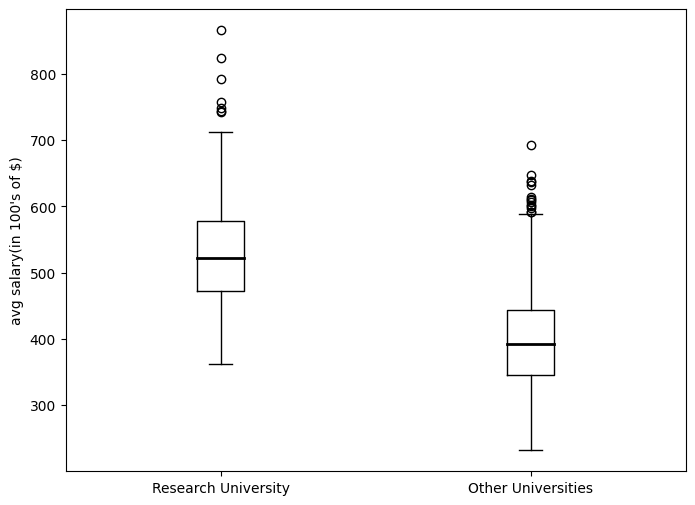

Mean of avg salary in research university:$53366.666666666664
Mean of avg salary in private university:$39965.8835546476


In [8]:
#Q6. Are professors in research universities paid more than those in undergraduate universitites?

avg_sal_ar_pu1=[]
avg_sal_ar_pr1=[]

for i in range(len(aaup['avg sal-full profs'])):
    if aaup['type'][i]=='I' and aaup['avg sal-all ranks'][i]!='*':
        avg_sal_ar_pu1.append(int(aaup['avg sal-all ranks'][i]))
    if (aaup['type'][i]=='IIA' or aaup['type'][i]=='IIB') and aaup['avg sal-all ranks'][i]!='*':
        avg_sal_ar_pr1.append(int(aaup['avg sal-all ranks'][i]))

avg_sal_ar_pu=pd.Series(avg_sal_ar_pu1)
avg_sal_ar_pr=pd.Series(avg_sal_ar_pr1)

fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([avg_sal_ar_pu, avg_sal_ar_pr], positions=[1, 2], medianprops=dict(color='black', linewidth=2))

ax.set_xticklabels(["Research University", "Other Universities"])
ax.set_ylabel("avg salary(in 100's of $)")

plt.show()

print(f"Mean of avg salary in research university:${avg_sal_ar_pu.mean()*100}")
print(f"Mean of avg salary in private university:${avg_sal_ar_pr.mean()*100}")

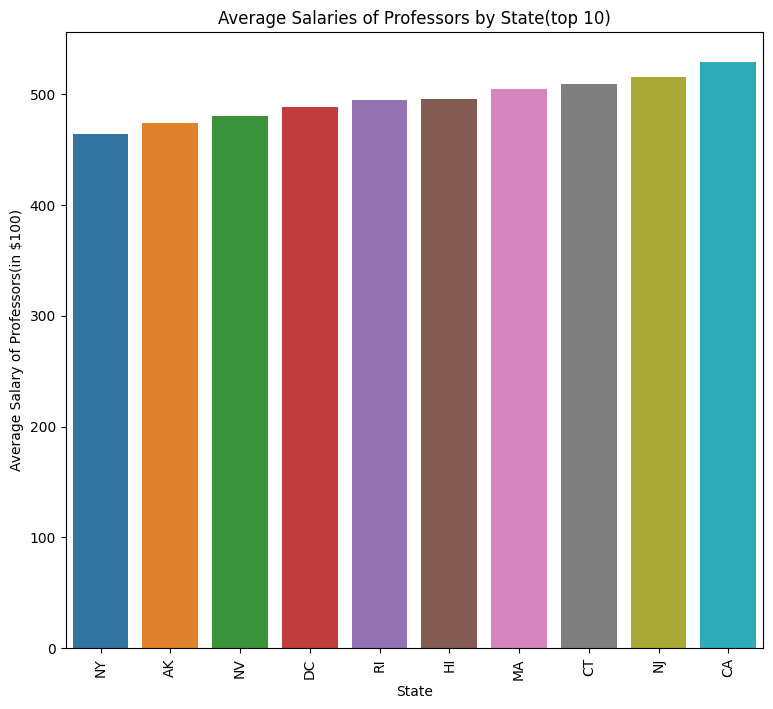

The average salary of professors in CA is $52942.5925925926
The average salary of professors in WV is $33893.333333333336


In [9]:
#Q7. What is the variation in the average salaries of professors from state to state? Is there any particular reason for it?
state_salaries = aaup.groupby('state')['avg sal-all ranks'].mean().reset_index()

state_salaries = state_salaries.sort_values('avg sal-all ranks')
state_salaries1 = state_salaries.tail(10)
state_salaries2= state_salaries.head()
plt.figure(figsize=(9, 8))
ax=sns.barplot(x='state', y='avg sal-all ranks', data=state_salaries1)
plt.xlabel('State')
plt.ylabel('Average Salary of Professors(in $100)')
plt.title('Average Salaries of Professors by State(top 10)')
plt.xticks(rotation=90)
plt.show()

print(f"The average salary of professors in {'CA'} is ${float(state_salaries['avg sal-all ranks'][4])*100}")
print(f"The average salary of professors in {'WV'} is ${float(state_salaries2['avg sal-all ranks'][49])*100}")


-0.0423733709804095


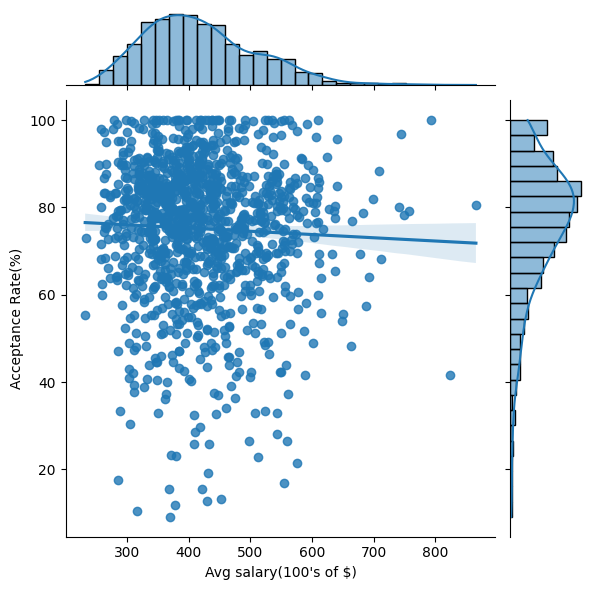

In [10]:
#Q8. Are professors in colleges with lesser acceptance rate more likely to be paid more than other colleges with higher acceptance rates?
ar=[]
sal=[]

for i in range(len(aaup['avg sal-all ranks'])):
    if aaup['avg sal-all ranks'][i]!='*' and usnews['appl_received'][i]!='*' and usnews['appl_accepted'][i]!='*':
        ar.append((int(usnews['appl_accepted'][i])/int(usnews['appl_received'][i]))*100)
        sal.append(int(aaup['avg sal-all ranks'][i]))

data1=pd.DataFrame({"Avg salary(100's of $)":sal,"Acceptance Rate(%)":ar})

print(data1["Avg salary(100's of $)"].corr(data1['Acceptance Rate(%)']))
sns.jointplot(data=data1,x="Avg salary(100's of $)",y="Acceptance Rate(%)",kind='reg')

Mean of full profs avg salary:$ 52644.73438956197
Mean of associate profs avg salary:$ 42001.02516309413
Mean of assistant profs avg salary:$ 44639.981360671016


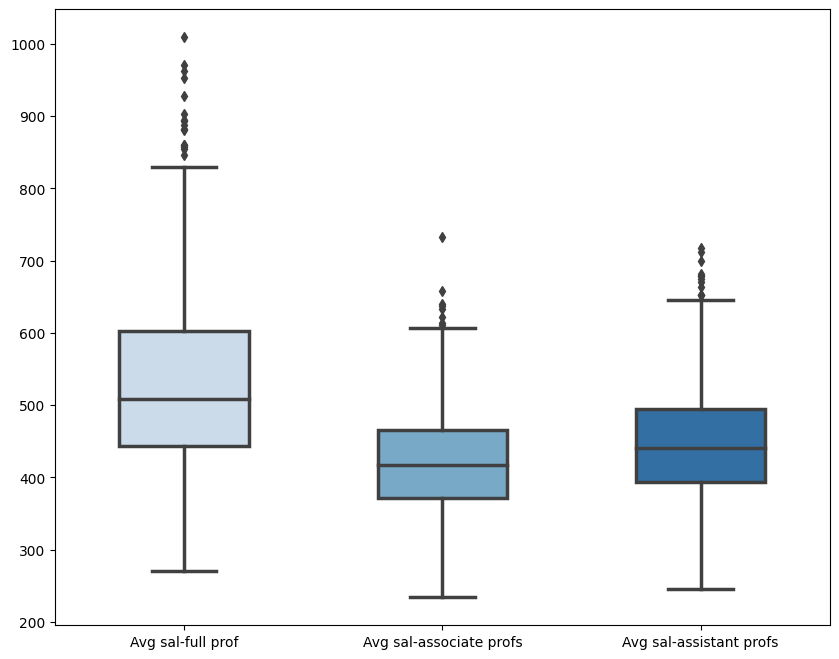

In [11]:
#Q9. How does the distribution of salary vary across full profs, assoct profs and asst profs?
avg_sal_fp1=aaup['avg sal-full profs']
avg_sal_ascp1=aaup['avg sal-assoct profs']
avg_sal_astp1=aaup['avg comp-asst profs']
avg_sal_fp=[]
avg_sal_ascp=[]
avg_sal_astp=[]

for i in range(len(aaup['avg sal-full profs'])):
    if avg_sal_fp1[i]!='*' and avg_sal_ascp1[i]!='*' and avg_sal_astp1[i]!='*':
        avg_sal_fp.append(int(avg_sal_fp1[i]))
        avg_sal_ascp.append(int(avg_sal_ascp1[i]))
        avg_sal_astp.append(int(avg_sal_astp1[i]))

data=pd.DataFrame({"Avg sal-full prof":avg_sal_fp,"Avg sal-associate profs":avg_sal_ascp,"Avg sal-assistant profs":avg_sal_astp})

fig=plt.subplots(figsize=(10,8))
sns.boxplot(data=data, width=0.5,linewidth=2.5, fliersize=5, palette="Blues")
print(f"Mean of full profs avg salary:$ {(pd.Series(avg_sal_fp)).mean()*100}")
print(f"Mean of associate profs avg salary:$ {(pd.Series(avg_sal_ascp)).mean()*100}")
print(f"Mean of assistant profs avg salary:$ {(pd.Series(avg_sal_astp)).mean()*100}")

-0.0034918268750390937


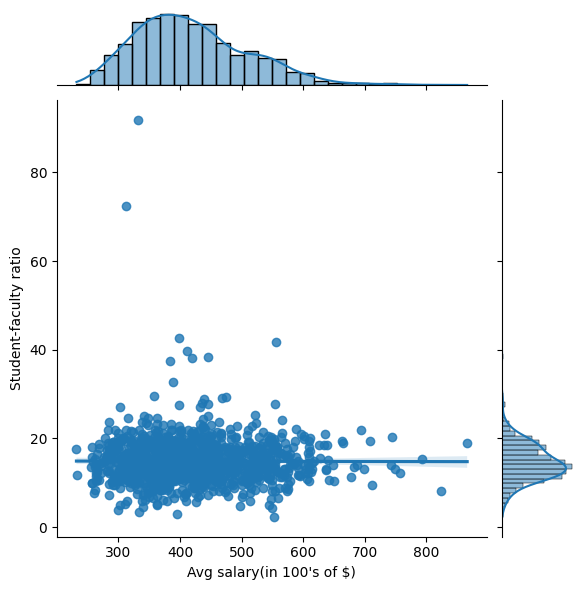

In [12]:
#Q10. Are institutions with higher student-to-faculty ratios more likely to pay their faculty members less?
sal=[]
sfr=[]

for i in range(len(aaup['avg sal-all ranks'])):
    if aaup['avg sal-all ranks'][i]!='*' and usnews['s_f_ratio'][i]!='*':
        sfr.append(float(usnews['s_f_ratio'][i]))
        sal.append(int(aaup['avg sal-all ranks'][i]))
        
data1=pd.DataFrame({"Avg salary(in 100's of $)":sal,"Student-faculty ratio":sfr})

print(data1["Avg salary(in 100's of $)"].corr(data1['Student-faculty ratio']))
sns.jointplot(data=data1,x="Avg salary(in 100's of $)",y="Student-faculty ratio",kind='reg')

Mean benefits to research university:$13192.777777777777
Mean benefits to private university:$10162.142857142857


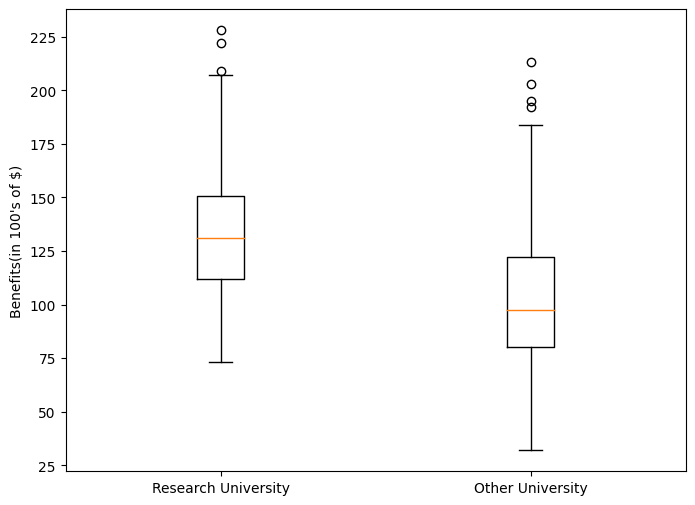

In [15]:
#Q11. Do research universities provide more facilities(i.e. higher compensation) than other non-research focused universities?
f_pu=[]
f_pr=[]

for i in range(len(aaup['avg sal-all ranks'])):
    if aaup['type'][i]!='*' and aaup['avg sal-all ranks'][i]!='*' and aaup['avg comp-all ranks'][i]!='*':
        if aaup['type'][i]=='I':
            f_pu.append(int(aaup['avg comp-all ranks'][i])-int(aaup['avg sal-all ranks'][i]))
        else:
            f_pr.append(int(aaup['avg comp-all ranks'][i])-int(aaup['avg sal-all ranks'][i]))
        
data1=pd.DataFrame({"Benefits provided by research university":f_pu})
data2=pd.DataFrame({"Benefits provided by other university":f_pr})

print(f"Mean benefits to research university:${pd.Series(f_pu).mean()*100}")
print(f"Mean benefits to private university:${pd.Series(f_pr).mean()*100}")

fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([data1["Benefits provided by research university"], data2["Benefits provided by other university"]], positions=[1, 2])

ax.set_xticklabels(["Research University", "Other University"])
ax.set_ylabel("Benefits(in 100's of $)")

plt.show()